**Atividade**

Agora é hora de aplicar o que aprendemos em sala.

Escolha um dos Dataset abaixo e treine um modelo de visão computacional para classificar as imagens. Explore o máximo do conteúdo vimos até aqui. Fale sobre a arquitetura usada, estratégia, resultado e conclusão.

*	Classificação de grãos de café – Conjunto de dados com imagens de grãos de café para classificação do nível de torrefação (Dark, Green, Light, Medium):
https://www.kaggle.com/datasets/gpiosenka/coffee-bean-dataset-resized-224-x-224

*	Classificação de gado por raça – Conjunto de dados com imagens de gados de diferentes raças para classificação (ex. Belmont, Gir, Jersey, etc.):
https://www.kaggle.com/datasets/iamshahadat/cattle

*	Detecção de insetos e pragas agrícolas em imagens – Conjunto com 12 diferentes espécies insetos e pragas agrícolas:
https://www.kaggle.com/datasets/vencerlanz09/agricultural-pests-image-dataset



# Classificação de grãos de café

In [ ]:
! kaggle datasets download -d gpiosenka/coffee-bean-dataset-resized-224-x-224

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/coffee-bean-dataset-resized-224-x-224
License(s): CC-BY-SA-4.0
100% 144M/144M [00:05<00:00, 33.4MB/s]
100% 144M/144M [00:05<00:00, 26.8MB/s]


In [ ]:
!unzip /content/coffee-bean-dataset-resized-224-x-224.zip

Archive:  /content/coffee-bean-dataset-resized-224-x-224.zip
  inflating: Coffee Bean.csv         
  inflating: test/Dark/dark (1).png  
  inflating: test/Dark/dark (10).png  
  inflating: test/Dark/dark (100).png  
  inflating: test/Dark/dark (11).png  
  inflating: test/Dark/dark (12).png  
  inflating: test/Dark/dark (13).png  
  inflating: test/Dark/dark (14).png  
  inflating: test/Dark/dark (15).png  
  inflating: test/Dark/dark (16).png  
  inflating: test/Dark/dark (17).png  
  inflating: test/Dark/dark (18).png  
  inflating: test/Dark/dark (19).png  
  inflating: test/Dark/dark (2).png  
  inflating: test/Dark/dark (20).png  
  inflating: test/Dark/dark (21).png  
  inflating: test/Dark/dark (22).png  
  inflating: test/Dark/dark (23).png  
  inflating: test/Dark/dark (24).png  
  inflating: test/Dark/dark (25).png  
  inflating: test/Dark/dark (26).png  
  inflating: test/Dark/dark (27).png  
  inflating: test/Dark/dark (28).png  
  inflating: test/Dark/dark (29).png  
  inf

In [ ]:
!apt-get install tree
!tree -d train

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (386 kB/s)
Selecting previously unselected package tree.
(Reading database ... 121926 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
train
├── Dark
├── Green
├── Light
└── Medium

4 directories


In [ ]:
import os
def listar_pastas(diretorio):
    if os.path.exists(diretorio):
        itens = os.listdir(diretorio)
        pastas = [item for item in itens if os.path.isdir(os.path.join(diretorio, item))]
        return pastas
    else:
        print(f'O diretório {diretorio} não existe.')

diretorio = '/content/test'
pastas = listar_pastas(diretorio)

In [ ]:
pastas.sort()
pastas

['Dark', 'Green', 'Light', 'Medium']

In [ ]:
import tensorflow as tf
import os
import numpy as np

labels = []
images_data = tf.zeros([0,256,256,3], dtype=tf.float32)
ps = ['test/','train/']
directory ='/content/'

for p in pastas:

  for a in ps:

    directory = '/content/'+a+p

    # Função para processar os arquivos
    def process_image(file_path):
        # Lê o arquivo e converte para uma imagem
        img = tf.io.read_file(file_path)
        img = tf.image.decode_jpeg(img, channels=3)  # Use decode_jpeg para definir a forma
        img = tf.image.resize(img, [256, 256])  # Redimensionar a imagem para um tamanho fixo
        img = img / 255.0  # Normalizar os valores dos pixels para [0, 1]
        return img

    # Criar um dataset a partir dos arquivos
    list_ds = tf.data.Dataset.list_files(os.path.join(directory, '*'))

    # Aplicar a função de processamento ao dataset
    image_ds = list_ds.map(process_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # Define a batch size para agrupar todas as imagens em um único batch
    batch_size = tf.data.experimental.cardinality(image_ds).numpy()
    image_ds = image_ds.batch(batch_size)

    # Converter o dataset em um tensor
    for images_tensor in image_ds:
      continue

    images_data = tf.concat([images_data, images_tensor], axis=0)
    labels = np.concatenate((labels, [p] * images_tensor.shape[0]))


In [ ]:
labels.shape, images_data.shape

((1600,), TensorShape([1600, 256, 256, 3]))

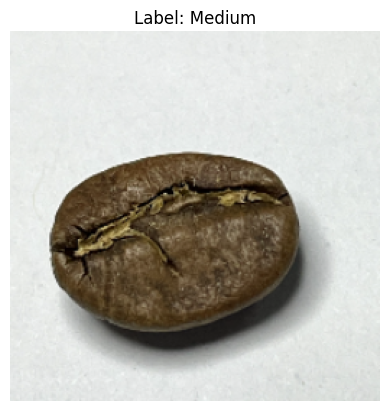

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(images_data[1550])
plt.title(f"Label: {labels[1550]}")
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

labels_encoder = LabelEncoder()

# Ajustar o LabelEncoder e transformar os rótulos categóricos em numéricos
rotulos_numericos = labels_encoder.fit_transform(labels)

print("Rótulos categóricos:", labels[:10])
print("Rótulos numéricos:", rotulos_numericos[:10])
print(rotulos_numericos.shape)


Rótulos categóricos: ['Dark' 'Dark' 'Dark' 'Dark' 'Dark' 'Dark' 'Dark' 'Dark' 'Dark' 'Dark']
Rótulos numéricos: [0 0 0 0 0 0 0 0 0 0]
(1600,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_data.numpy(), rotulos_numericos, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1280, 256, 256, 3), (320, 256, 256, 3), (1280,), (320,))

In [ ]:
# continue ....

In [ ]:
# Fale sobre a arquitetura usada, estratégia, resultado e conclusão.

# Classificação de gado por raça

In [ ]:
! kaggle datasets download -d iamshahadat/cattle

In [ ]:
!unzip /content/cattle.zip

In [ ]:
!apt-get install tree
!tree -d CattleBreed

In [ ]:
import numpy as np
classes = np.squeeze([['Abondance'],
 ['Afrikaner'],
 ['Albera'],
 ['AmericanMilkingDevon'],
 ['Angus']
 ,['AnkoleWatusi']
 ,['Aquitaine']
 ,['Argentine']
 ,['Armorican']
 ,['Arouquesa']
 ,['Asturian']
 ,['AustralianBraford']
 ,['Bargur']
 ,['Barzona']
 ,['Bazadaise']
 ,['Belgian']
 ,['Belmont']
 ,['BlackHereford']
 ,['BlondeAquitaine']
 ,['Boran']
 ,['Braford']
 ,['Brahman']
 ,['Brangus']
 ,['Braunvieh']
 ,['Brava']
 ,['Burlina']
 ,['Busa']
 ,['Cachena']
 ,['Camargue']
 ,['CanadianSpeckle']
 ,['Canadienne']
 ,['Canchim']
 ,['Caracu']
 ,['Casta']
 ,['Charolais']
 ,['Chianina']
 ,['Corriente']
 ,['Corsican']
 ,['Criollo']
 ,['Dangi']
 ,['DanishRed']
 ,['Deoni']
 ,['Devon']
 ,['Dexter']
 ,['Dhannir']
 ,['Droughtmaster']
 ,['DutchBelted']
 ,['EnglishLonghorn']
 ,['Evolene']
 ,['Fjall']
 ,['Fleckvlehl']
 ,['FloridaCracker']
 ,['Galloway']
 ,['Gangatiri']
 ,['Gaolao']
 ,['Gascon']
 ,['Gelbvieh']
 ,['GermanAngus']
 ,['Gir']
 ,['Glan']
 ,['Gloucester']
 ,['HackCattle']
 ,['Halikar']
 ,['Haryana']
 ,['Hereford']
 ,['Highland']
 ,['Hinterwald']
 ,['HolandoArgentio']
 ,['HungarianGrey']
 ,['Icelandic']
 ,['Jutland']
 ,['Kangayam']
 ,['Kankrej']
 ,['Kerry']
 ,['KrishnaValley']
 ,['Kuri']
 ,['LatvianBrowni']
 ,['Lohani']
 ,['Lowline']
 ,['Luing']
 ,['Malvi']
 ,['Maronesa']
 ,['Mewati']
 ,['MilkingShorthorn']
 ,['Mirandesa']
 ,['Montb├йliarde']
 ,['Murboden']
 ,['brownSwiss']
 ,['herens']
 ,['jersey']])

In [ ]:
import os
from PIL import Image
import tensorflow as tf

def decode_img(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_image(img, channels=3)  # Specify channels if needed (e.g., 3 for RGB)
    return img

# Função para verificar se o arquivo é uma imagem válida
def verificar_imagem_valida(diretorio):
    formatos_validos = ('.jpeg', '.jpg','.png', '.gif', '.bmp')
    for raiz, _, arquivos in os.walk(diretorio):
        for arquivo in arquivos:
            caminho_arquivo = os.path.join(raiz, arquivo)

            if not caminho_arquivo.lower().endswith(formatos_validos):
                print(f"Removendo arquivo inválido: {caminho_arquivo}")
                os.remove(caminho_arquivo)
            else:
                try:
                    img = Image.open(caminho_arquivo)
                    img.verify()  # Verifica se a imagem pode ser aberta
                except (IOError, SyntaxError) as e:
                    print(f"Removendo imagem corrompida: {caminho_arquivo}")
                    os.remove(caminho_arquivo)
            try:
              image_deco = decode_img(caminho_arquivo)
              # print("Image successfully decoded")
            except Exception as e:
              print(f"Error decoding image: {e}")
              os.remove(caminho_arquivo)

for c in classes:
  # Diretório contendo as imagens
  diretorio_teste = '/content/CattleBreed/'+c
  # print(diretorio_teste)
  # Verificar e remover arquivos inválidos antes de carregar os dados
  verificar_imagem_valida(diretorio_teste)

In [ ]:
# continue ...

In [ ]:
# Fale sobre a arquitetura usada, estratégia, resultado e conclusão.

# Detecção de insetos e pragas agrícolas em imagens

In [ ]:
! kaggle datasets download -d vencerlanz09/agricultural-pests-image-dataset

Dataset URL: https://www.kaggle.com/datasets/vencerlanz09/agricultural-pests-image-dataset
License(s): copyright-authors
agricultural-pests-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/agricultural-pests-image-dataset.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: ants/ants (95).jpg      
  inflating: ants/ants (96).jpg      
  inflating: ants/ants (97).jpg      
  inflating: ants/ants (98).jpg      
  inflating: ants/ants (99).jpg      
  inflating: bees/bees (1).jpg       
  inflating: bees/bees (10).jpg      
  inflating: bees/bees (100).jpg     
  inflating: bees/bees (101).jpg     
  inflating: bees/bees (102).jpg     
  inflating: bees/bees (103).jpg     
  inflating: bees/bees (104).jpg     
  inflating: bees/bees (105).jpg     
  inflating: bees/bees (106).jpg     
  inflating: bees/bees (107).jpg     
  inflating: bees/bees (108).jpg     
  inflating: bees/bees (109).jpg     
  inflating: bees/bees (11).jpg      
  inflating: bees/bees (110).jpg     
  inflating: bees/bees (111).jpg     
  inflating: bees/bees (112).jpg     
  inflating: bees/bees (113).jpg     
  inflating: bees/bees (114).jpg     
  inflating: bees/bees (115).jpg     
  inflating: bees/bees (116).

In [ ]:
!apt-get install tree
!tree -d /content/

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (157 kB/s)
Selecting previously unselected package tree.
(Reading database ... 121926 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
/content/
├── ants
├── bees
├── beetle
├── catterpillar
├── earthworms
├── earwig
├── grasshopper
├── moth
├── sample_data
├── slug
├── snail
├── wasp
└── weevil

13 directories


In [ ]:
import os
diretorio_imagens = '/content/'
subdiretorios = os.listdir(diretorio_imagens)
classes = []
for subdiretorio in subdiretorios:
    classes.append(subdiretorio)
classes = [c for c in classes if c not in ['.config','agricultural-pests-image-dataset.zip', 'sample_data']]

In [ ]:
import tensorflow as tf
import os
import numpy as np

labels = []
images_data = tf.zeros([0,256,256,3], dtype=tf.float32)

for p in classes:

  directory = '/content/'+p

  # Função para processar os arquivos
  def process_image(file_path):
      # Lê o arquivo e converte para uma imagem
      img = tf.io.read_file(file_path)
      img = tf.image.decode_jpeg(img, channels=3)  # Use decode_jpeg para definir a forma
      img = tf.image.resize(img, [256, 256])  # Redimensionar a imagem para um tamanho fixo
      img = img / 255.0  # Normalizar os valores dos pixels para [0, 1]
      return img

  # Criar um dataset a partir dos arquivos
  list_ds = tf.data.Dataset.list_files(os.path.join(directory, '*'))

  # Aplicar a função de processamento ao dataset
  image_ds = list_ds.map(process_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

  # Define a batch size para agrupar todas as imagens em um único batch
  batch_size = tf.data.experimental.cardinality(image_ds).numpy()
  image_ds = image_ds.batch(batch_size)

  # Converter o dataset em um tensor
  for images_tensor in image_ds:
    continue

  images_data = tf.concat([images_data, images_tensor], axis=0)
  labels = np.concatenate((labels, [p] * images_tensor.shape[0]))

In [ ]:
images_data.shape, labels.shape

(TensorShape([5494, 256, 256, 3]), (5494,))

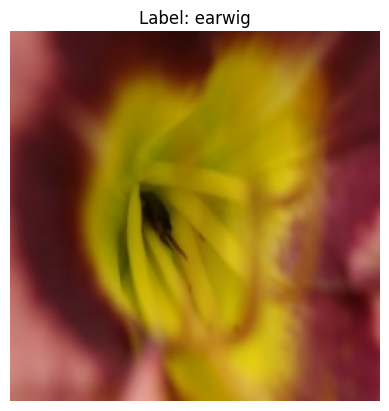

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(images_data[2550])
plt.title(f"Label: {labels[2550]}")
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

labels_encoder = LabelEncoder()

# Ajustar o LabelEncoder e transformar os rótulos categóricos em numéricos
rotulos_numericos = labels_encoder.fit_transform(labels)

print("Rótulos categóricos:", labels[:-10])
print("Rótulos numéricos:", rotulos_numericos[:-10])
print(rotulos_numericos.shape)


NameError: name 'labels' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_data.numpy(), rotulos_numericos, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# continue ...
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Definindo a arquitetura do modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

# Compilando o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Sumário do modelo
model.summary()

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Avaliando o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia no conjunto de teste: {accuracy*100:.2f}%")

# Plotando a acurácia de treinamento e validação
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Plotando a perda de treinamento e validação
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.show()

NameError: name 'classes' is not defined

In [ ]:
# Fale sobre a arquitetura usada, estratégia, resultado e conclusão.




A arquitetura de Redes Neurais Convolucionais (CNNs) é muito utilizada em aplicações de visão computacional devido à sua capacidade de capturar e reconhecer padrões espaciais em imagens.